In [1]:
import pandas as pd
import matplotlib
import geopandas
from matplotlib import pyplot as plt
import math

In [2]:
df=pd.read_csv("data/all_water_mains_with_breaksinfo.csv")

In [3]:
breaks=df[df["break_date"]!="None"]

In [4]:
one = breaks.Material.value_counts()

In [5]:
two=df.Material.value_counts()

In [6]:
material = pd.DataFrame(two)

In [7]:
material["broken"] = one

In [8]:
material.loc["CIPP","broken"]=0
material.loc["HDPE","broken"]=0

In [9]:
material["Material"]=material["Material"]/1000
material["broken"]=material["broken"]/1000

In [10]:
material["percentage"] = material["broken"]/material["Material"]*100
material["p"] = round(material["percentage"],2)
material = material.astype({"p":str})
material = material.drop(["None"])
material

,Material,broken,percentage,p
DI,15.070,0.404,2.680823,2.68
CI,3.775,1.898,50.278146,50.28
SAND,2.211,0.371,16.779738,16.78
SPUN,1.879,0.855,45.502927,45.5
PVC,0.212,0.010,4.716981,4.72
COPPER,0.153,0.004,2.614379,2.61
CIPP,0.147,0.000,0.000000,0.0
HDPE,0.031,0.000,0.000000,0.0


In [11]:
matplotlib.rcParams.update({"font.size":16})

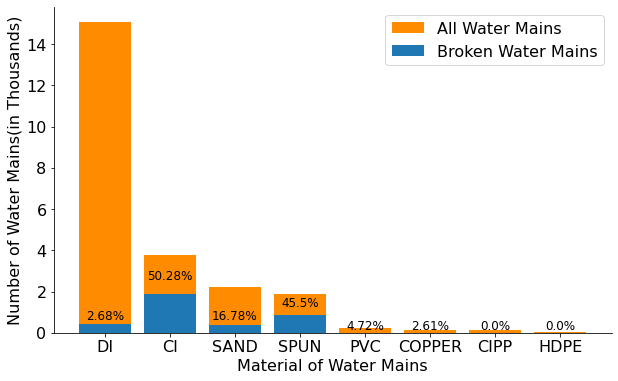

In [12]:
#https://moonbooks.org/Articles/How-to-add-text-on-a-bar-with-matplotlib-/
fig,ax = plt.subplots(figsize = (10,6))
total = plt.bar(x=material.index,height = material["Material"],color = "darkorange")
broken = plt.bar(x=material.index,height = material["broken"])
#material.plot.bar(y="Material",ax=ax)
#material.plot.bar(y="broken",ax=ax,color = "orange")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for idx,rect in enumerate(broken):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 1.3*height,
                material["p"][idx]+"%",
                ha='center', va='bottom', rotation=0,fontsize = 12)
ax.set_xlabel("Material of Water Mains")
ax.set_ylabel("Number of Water Mains(in Thousands)")
ax.legend(["All Water Mains","Broken Water Mains"])

In [14]:
wm = geopandas.read_file("zip://data/WaterMains.zip")

In [13]:
material_dict = {"Spring":{},
            "Summer":{},
            "Fall":{},
            "Winter":{}}
for i in breaks.index:
    if breaks.loc[i,"Material"]=="None":
        continue
    if breaks.loc[i,"Material"] not in material_dict[breaks.loc[i,"season"]]:
        material_dict[breaks.loc[i,"season"]][breaks.loc[i,"Material"]]=1
    else:
        material_dict[breaks.loc[i,"season"]][breaks.loc[i,"Material"]]+=1

In [14]:
df = pd.DataFrame.from_dict(material_dict,orient = "index")

In [16]:
df.loc["Fall","COPPER"]=0
df = df.drop(["PVC","COPPER"],axis = 1)
df

,DI,CI,SPUN,SAND
Spring,75,209,100,58
Summer,72,130,58,97
Fall,77,223,81,69
Winter,180,1336,616,147


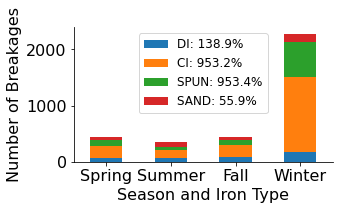

In [20]:
matplotlib.rcParams.update({"font.size":16})
fig,ax = plt.subplots(figsize = (5,3))
df.plot.bar(stacked = True,ax=ax)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.xticks(rotation = 0)
ax.set_xlabel("Season and Iron Type")
ax.set_ylabel("Number of Breakages")
ax.legend(["DI: 138.9%","CI: 953.2%","SPUN: 953.4%","SAND: 55.9%"],loc = "upper center",fontsize = 12)
plt.tight_layout()
#plt.savefig("Season and Iron Type.pdf")

In [24]:
for m in ["DI","CI","SPUN","SAND","PVC","COPPER"]:
    a = df.loc["Winter",m]
    b = df.loc["Summer",m]
    print(m+": "+str((a-b)/b))

DI: 1.3888888888888888
CI: 9.531746031746032
SPUN: 9.53448275862069
SAND: 0.5591397849462365
PVC: -0.6666666666666666
COPPER: 1.0


In [25]:
df

,DI,CI,SPUN,SAND,PVC,COPPER
Spring,74,206,98,58,2,1.0
Summer,72,126,58,93,3,1.0
Fall,76,219,77,67,1,0.0
Winter,172,1327,611,145,1,2.0


In [43]:
breaks["break_date"]

6        2015-01-15
9        2008-03-30
11       1999-12-27
28       2019-01-17
32       2011-09-22
            ...    
23731    2017-01-09
23754    1999-12-27
23755    2015-01-15
23780    1999-12-21
23843    1998-08-21
Name: break_date, Length: 3504, dtype: object

In [30]:
al = pd.DataFrame(wm.Material.value_counts())
al

,Material
DI,14972
CI,2861
SAND,2064
SPUN,1441
PVC,212
COPPER,153
CIPP,147
HDPE,31


In [33]:
material["all"]=al["Material"]/1000
material["percentage"] = material["broken"]/material["all"]*100
material["p"] = round(material["percentage"],2)
material = material.astype({"p":str})
material

,Material,broken,percentage,p,all
DI,14.947,0.394,2.631579,2.63,14.972
CI,3.725,1.878,65.641384,65.64,2.861
SAND,2.188,0.363,17.587209,17.59,2.064
SPUN,1.851,0.844,58.570437,58.57,1.441
PVC,0.201,0.007,3.301887,3.3,0.212
COPPER,0.153,0.004,2.614379,2.61,0.153
CIPP,0.147,0.000,0.000000,0.0,0.147
HDPE,0.031,0.000,0.000000,0.0,0.031


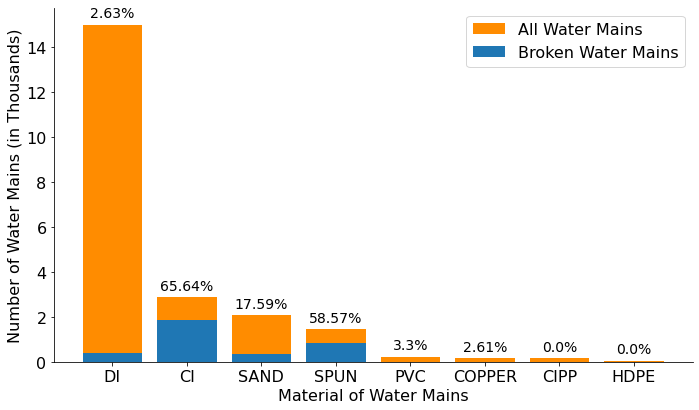

In [53]:
fig,ax = plt.subplots(figsize = (10,6))
total = plt.bar(x=material.index,height = material["all"],color = "darkorange")
broken = plt.bar(x=material.index,height = material["broken"])
#material.plot.bar(y="Material",ax=ax)
#material.plot.bar(y="broken",ax=ax,color = "orange")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for idx,rect in enumerate(total):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height+0.2,
                material["p"][idx]+"%",
                ha='center', va='bottom', rotation=0,fontsize = 14)
ax.set_xlabel("Material of Water Mains")
ax.set_ylabel("Number of Water Mains (in Thousands)")
ax.legend(["All Water Mains","Broken Water Mains"])
plt.tight_layout()
#plt.savefig("Material of Water Mains.pdf")

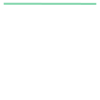

In [44]:
wm["geometry"][0]

In [45]:
tryyy.bounds

(818246.8087158203, 465305.28131103516, 818250.4555053711, 465305.28747558594)

In [46]:
wm["geometry"]

0        LINESTRING (818246.809 465305.287, 818250.456 ...
1        LINESTRING (818250.645 465308.776, 818250.456 ...
2        LINESTRING (819023.477 465921.541, 819025.375 ...
3        LINESTRING (819025.375 465918.600, 819032.423 ...
4        LINESTRING (818330.485 465303.820, 818346.420 ...
                               ...                        
22515    LINESTRING (773693.791 484574.175, 773693.674 ...
22516    LINESTRING (773691.327 484690.979, 773691.253 ...
22517    LINESTRING (788198.035 477702.644, 788198.153 ...
22518    LINESTRING (785556.369 477740.132, 785556.743 ...
22519    LINESTRING (831627.635 491294.153, 831627.422 ...
Name: geometry, Length: 22520, dtype: geometry

In [47]:
from shapely.geometry import LineString
from shapely.ops import transform
from functools import partial
import pyproj

print(str(tryyy.length) + " degrees")
# 0.0115488362184 degrees


3.6467947610708293 degrees


In [49]:
line1 = LineString([(15.799406, 40.636069), (15.810173,40.640246)])
print(str(line1.length) + " degrees")
# 0.0115488362184 degrees

# Geometry transform function based on pyproj.transform
project = partial(
    pyproj.transform,
    pyproj.Proj('EPSG:4326'),
    pyproj.Proj('EPSG:32633'))

line2 = transform(project, line1)
print(str(line2.length) + " meters")
# 1021.77585965 meters

0.011548836218425469 degrees
2569.3495520763076 meters


In [60]:
wm["geometry"].crs

<Projected CRS: ESRI:103412>
Name: NAD83(HARN) / WISCRS Dane (ftUS)
Axis Info [cartesian]:
- E[east]: Easting (US survey foot)
- N[north]: Northing (US survey foot)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (1SP)
Datum: NAD83 (High Accuracy Reference Network)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich